# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Hillidatul Ilmi

Batch : FTDS-012

Dataset : Informasi negara

Objective : Model clustering untuk mendeteksi kelompok negara. Berdasarkan hal ini, maka saya akan menanalisis clustering yaitu K-Means.

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
!pip install feature-engine
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Menampilkan atau memproses dataset berupa CSV dari drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
file = '/content/drive/MyDrive/Colab Notebooks/Data/lc4.csv'    

Link sumber untuk menampilkan dataset : https://www.kaggle.com/code/paultimothymooney/how-to-resolve-a-unicodedecodeerror-for-a-csv-file/notebook

In [4]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [5]:
data = pd.read_csv(file,encoding='ISO-8859-1')
data

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [6]:
# Duplicate Data
data_copy = data.copy()

Mengandakan(duplicate) dataset nya, jika ada perubahan kolom atau atribut tetap bisa dibandingkan dengan dataset asli. Fungsi dari pengandaan agar data asli masih bisa digunakan jika ada beberapa perubahan isi dari dataset.

In [7]:
# Mengecek ukuran dataset yang akan digunakan
print(data.shape)

(223, 6)


Berdasarkan perintah .shape bahwa ukuran dataset riwayat seorang pasien terdiri dari 223 baris dan 6 kolom

In [8]:
# Melihat Nama-Nama kolom dari tabel dataset
data.columns

Index(['Rank', 'Country', 'Overall Life', 'Male Life', 'Female Life',
       'Continent'],
      dtype='object')

data.columns melihatkan nama-nama fitur-fitur dari informasi 6 kolom sebelumnya 

In [9]:
# Mengecek informasi dataset dari tabel dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


Berdasarkan perintah data.info() bahwa tabel Kartu Kredit memiliki sekitar 6 kolom, dimana semua kolom Rank, Overall Life, Male Lif dan Female Life adalah kolom numerik dan kolom country dan continent adalah kolom kategorik.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

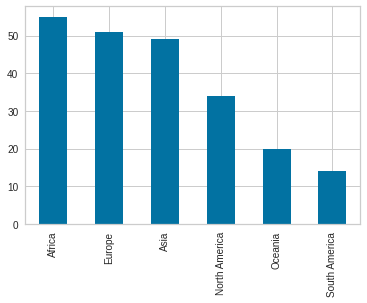

In [10]:
data['Continent'].value_counts().plot(kind='bar')

Berdasarkan Hasil Visualisasi diagram batang, bahwa negara Africa memiliki informasi yang lebih banyak, lalu dilanjutkan negara kedua yaitu negara Europe. Informasi negara yang kurang spesifik atau sedikit adalah negara South America.

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5a - Data Inference

In [11]:
# Dapatkan Data untuk Inferensi Model
datainfernce = data.sample(10, random_state=10) 
datainfernce

,Rank,Country,Overall Life,Male Life,Female Life,Continent
188,189,South Africa,63.1,61.6,64.6,Africa
26,27,Cayman Islands,81.2,78.5,84.0,North America
76,77,Dominica,77.0,74.0,80.1,North America
68,69,Poland,77.6,73.7,81.7,Europe
78,79,Algeria,76.8,75.5,78.2,Africa
87,88,Republic of Macedonia,76.2,73.6,79.0,Europe
102,103,American Samoa,75.4,72.4,78.5,Oceania
60,61,Dominican Republic,78.1,75.9,80.5,North America
69,70,United Arab Emirates,77.5,74.8,80.2,Asia
121,122,Montserrat,74.4,75.8,72.9,North America


Dari sekumpulan informasi dataset kartu kredit default, terdapat 10 data yang diduga tidak masuk dalam kumpulan dataset atau tetapi terdapat di bagian data inference.

In [12]:
# Hapus Kumpulan Inferensi dari Kumpulan Data negara
data_test = data.drop(datainfernce.index)
data_test

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [13]:
data.shape

(223, 6)

Ketika belum memisahkan data inference dari dataset bahwa, jumlah dataset awal riwayat kartu kredit memiliki 223 baris kemudian menghilangkan/memisahkan data inference dari dataset kartu kredit default berubah menjadi 213 baris.

In [14]:
# Reset Index
# Agar tidak terjadi yang tidak diinginkan, data di reset index nya untuk keterurutan

data_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,189,South Africa,63.1,61.6,64.6,Africa
1,27,Cayman Islands,81.2,78.5,84.0,North America
2,77,Dominica,77.0,74.0,80.1,North America
3,69,Poland,77.6,73.7,81.7,Europe
4,79,Algeria,76.8,75.5,78.2,Africa
5,88,Republic of Macedonia,76.2,73.6,79.0,Europe
6,103,American Samoa,75.4,72.4,78.5,Oceania
7,61,Dominican Republic,78.1,75.9,80.5,North America
8,70,United Arab Emirates,77.5,74.8,80.2,Asia
9,122,Montserrat,74.4,75.8,72.9,North America


Dibagian data inference indexnya tidak terurut karena menyesuaikan letak baris dari data yang tidak termasuk dataset negara, tetapi setelah di reset index jadi tersusun index nomornya. Dilakukan restart index, agar ketika dijalankan sampai bawah atau proses selesai jika ada keselahan hasil, sudah dipastikan bukan karena index nya berantakan atau tidak beraturan.

## 5b - Handling Missing Value


In [15]:
# Mengecek Missing Values fitur-fitur data kartu kredit
data.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

Setelah di lakukan pengecekan missing value pada data negara, maka masing-masing fitur sudah tidak terdapat Missing Value.

## 5c - Handling Outlier

In [16]:
# Berfungsi untuk membuat histogram dan boxplot.
# Fungsi ini menggunakan kerangka data census_adult_income dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

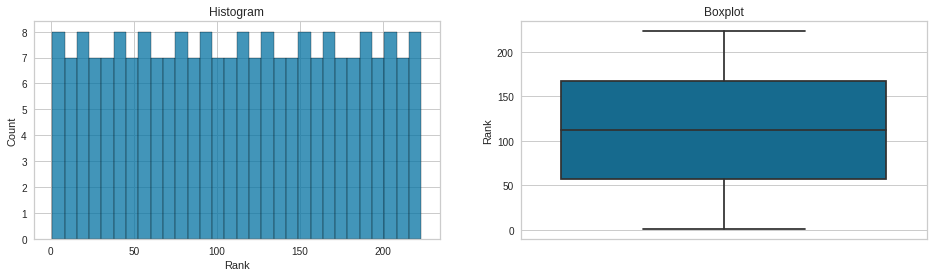


Skewness Value Rank :  0.0


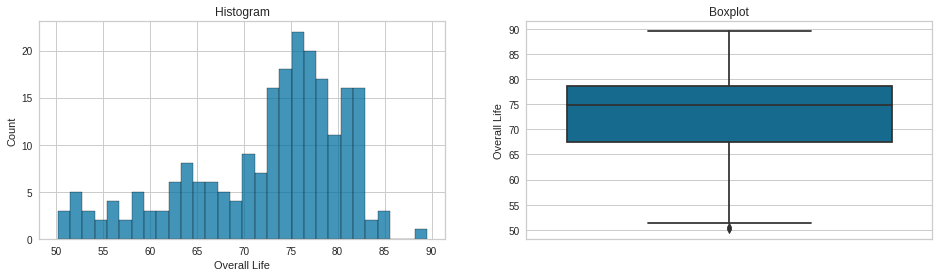


Skewness Value Overall Life :  -0.896327516670228


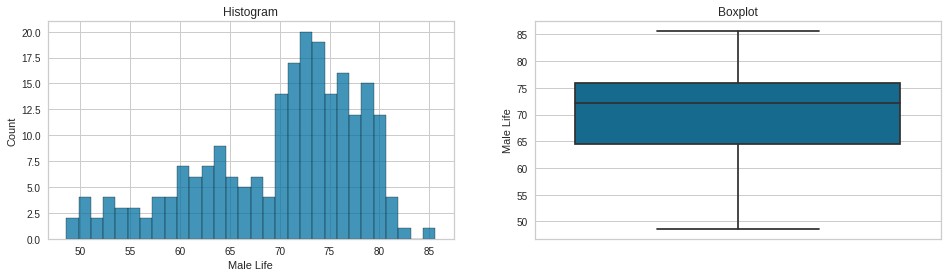


Skewness Value Male Life :  -0.7894352253835046


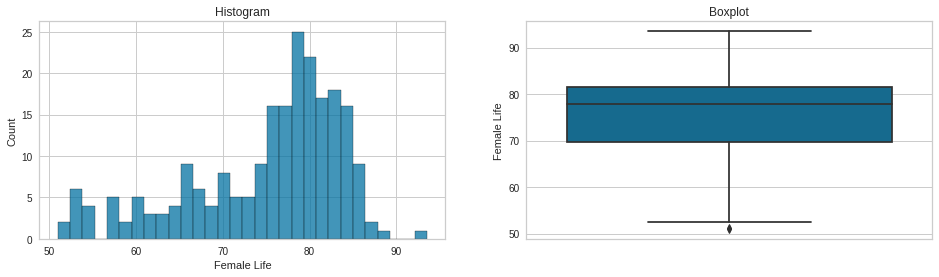


Skewness Value Female Life :  -0.9647680524178575


In [17]:
# Mengecek Distribusi fitur dan outlier menggunakan Boxplot

diagnostic_plots(data, 'Rank')
print('\nSkewness Value Rank : ', data['Rank'].skew())

diagnostic_plots(data, 'Overall Life')
print('\nSkewness Value Overall Life : ', data['Overall Life'].skew())

diagnostic_plots(data, 'Male Life')
print('\nSkewness Value Male Life : ', data['Male Life'].skew())

diagnostic_plots(data, 'Female Life')
print('\nSkewness Value Female Life : ', data['Female Life'].skew())

Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2. Keempat fitur yaitu rank, overll life, male life dan female life, semua datanya berdistribusi normal karena memiliki nilai skewness yang sesuai standarnya. Visualisasi boxplot keempat fitur terdapat outlier di bagian lower boxplot/bagian bawah boxplot pada fitur Overall life dan Female Life. Oleh karena itu akan di cari terlebih dahulu nilai IQR untuk menyamakan range nilainya agar masuk ke dalam boxplot. Serta membuat data menjadi berdistribusi normal.

In [18]:
# Menghitung/menentukan nilai IQR untuk data yang terdapat outlier
X = Winsorizer(capping_method='iqr', # pilih iqr untuk batas aturan IQR atau gaussian untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['Overall Life','Female Life'])
X.fit(data)
data_clean = X.transform(data) 


Rank - Setelah Handling Outlier Capping


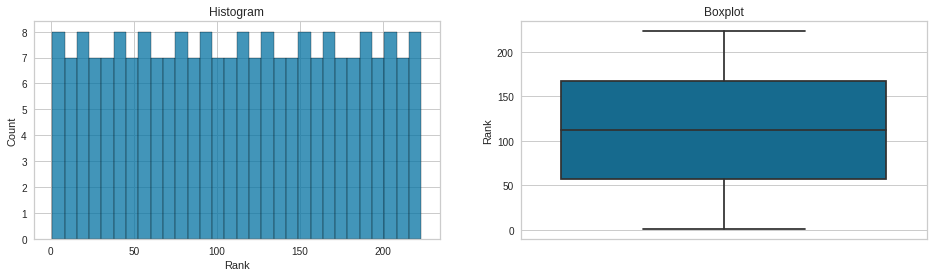


Skewness Value Rank :  0.0

Overall Life - Setelah Handling Outlier Capping


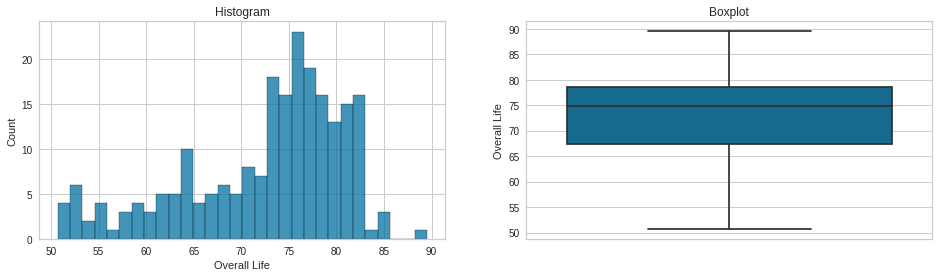


Skewness Value Overall Life :  -0.8926985648739192

Male Life - Setelah Handling Outlier Capping


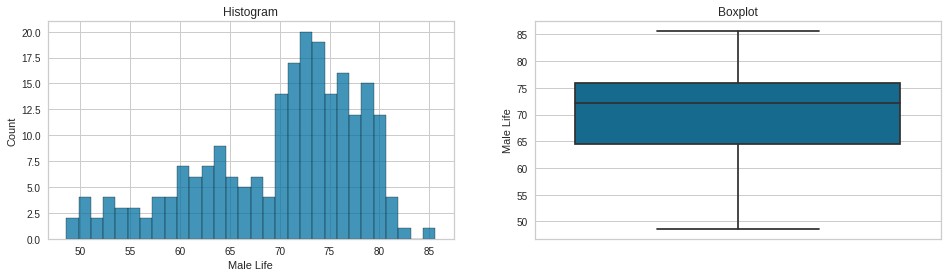


Skewness Value Male Life :  -0.7894352253835046

Female Life - Setelah Handling Outlier Capping


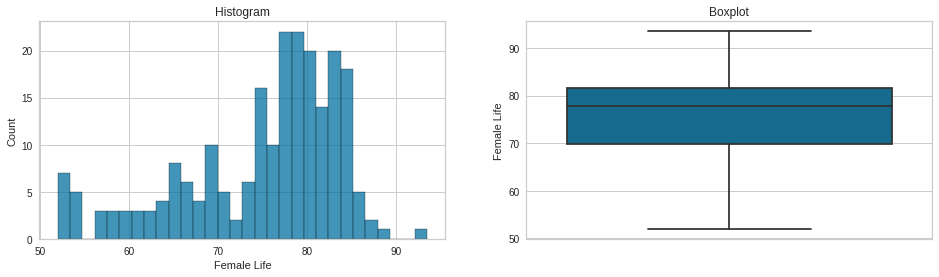


Skewness Value Female Life :  -0.9563619811512232


In [19]:
# Visualisasi Setelah Handling Outlier
print('\nRank - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'Rank')
print('\nSkewness Value Rank : ', data_clean['Rank'].skew())

print('\nOverall Life - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'Overall Life')
print('\nSkewness Value Overall Life : ', data_clean['Overall Life'].skew())

print('\nMale Life - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'Male Life')
print('\nSkewness Value Male Life : ', data_clean['Male Life'].skew())

print('\nFemale Life - Setelah Handling Outlier Capping')
diagnostic_plots(data_clean, 'Female Life')
print('\nSkewness Value Female Life : ', data_clean['Female Life'].skew())

Visualisasi histogram untuk distribusi normal dan boxplot identifikasi data oulier, berdasarkan gambar di atas bahwa keempat sudah berdistribusi normal. Dikatakan berdistribusi normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2, dimana keempat fitur tersebut memiliki nilai skewness sesuai standar penentuan. Untuk Data oulier sudah tidak ada lagi, karena semua data dari empat fitur yang menjauh dari pusat rata-rata sampel telah di sensoring semuanya untuk mempunyai range yang sama dalam kempulan/himpunan data. Sehingga sudah tidak ada lagi data outlier.

In [20]:
# Diperoleh data baru yang sudah dilakukan feature engineering 
# Variabel data_clean sudah bersih dari Missing Value dan Outlier
data_clean

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.500,85.6,93.500,Europe
1,2,Japan,85.000,81.7,88.500,Asia
2,3,Singapore,85.000,82.3,87.800,Asia
3,4,Macau; China,84.500,81.6,87.600,Asia
4,5,San Marino,83.300,80.7,86.100,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.100,51.6,52.500,Africa
219,220,Swaziland,51.600,52.2,51.975,Africa
220,221,Afghanistan,51.300,49.9,52.700,Asia
221,222,Guinea-Bissau,50.725,48.6,52.700,Africa


## 5d - Pemisahan Kolom Numerik dan Kategorik

In [21]:
# Memisahkan berkategori data Numerik dan data kategorik

numerik_col = data_clean._get_numeric_data().columns.tolist()
kategorik_col = data_clean.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', numerik_col)
print('Categorical Columns : ', kategorik_col)

Numeric Columns     :  ['Rank', 'Overall Life', 'Male Life', 'Female Life']
Categorical Columns :  ['Country', 'Continent']


In [22]:
X=data[numerik_col]

In [23]:
x=data[kategorik_col]

## 5e - Feature Scaling dan Feature Encoding

In [24]:
# Kategorik Scaling
# Membuat antara fitur memiliki range ukuran yang sama
encoder = OneHotEncoder()
encoder.fit(x)
datagod = encoder.transform(x).toarray()
datagod

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Numeric Scaling
# Membuat antara fitur memiliki range ukuran yang sama
num_scaler = MinMaxScaler()
num_scaler = num_scaler.fit(X)
datagood = num_scaler.transform(X)
datagood

array([[0.        , 1.        , 1.        , 1.        ],
       [0.0045045 , 0.88549618, 0.89459459, 0.88235294],
       [0.00900901, 0.88549618, 0.91081081, 0.86588235],
       [0.01351351, 0.87277354, 0.89189189, 0.86117647],
       [0.01801802, 0.84223919, 0.86756757, 0.82588235],
       [0.02252252, 0.8346056 , 0.87297297, 0.80705882],
       [0.02702703, 0.83206107, 0.85675676, 0.81882353],
       [0.03153153, 0.82951654, 0.86486486, 0.80235294],
       [0.03603604, 0.82442748, 0.85675676, 0.8       ],
       [0.04054054, 0.82188295, 0.84594595, 0.80941176],
       [0.04504505, 0.81933842, 0.86486486, 0.78588235],
       [0.04954955, 0.81933842, 0.82972973, 0.81882353],
       [0.05405405, 0.81679389, 0.84324324, 0.79764706],
       [0.05855856, 0.81424936, 0.84324324, 0.79529412],
       [0.06306306, 0.81424936, 0.83783784, 0.8       ],
       [0.06756757, 0.81170483, 0.85405405, 0.77882353],
       [0.07207207, 0.80661578, 0.82702703, 0.79058824],
       [0.07657658, 0.80661578,

In [26]:
X_final = np.concatenate([datagood, datagod], axis=1)
X_final

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0045045 , 0.88549618, 0.89459459, ..., 0.        , 0.        ,
        0.        ],
       [0.00900901, 0.88549618, 0.91081081, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99099099, 0.02798982, 0.03513514, ..., 0.        , 0.        ,
        0.        ],
       [0.9954955 , 0.01017812, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.01081081, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF untuk setiap fitur
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

        feature           VIF
0          Rank      2.891073
1  Overall Life  62961.063169
2     Male Life  17790.095126
3   Female Life  16782.557890


## 5f - Principal component analysis (PCA)

In [28]:
# Melakukan kompres informasi data atau meringkas informasi data
pca = PCA()
pca.fit(X_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Melakukan peringkasan informasi dari tabel kartu kredit sebesar 90% dari keseluruhan data.

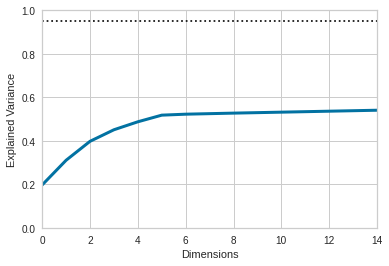

In [29]:
# Plot melihat banykanya yang bisa direduksi
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Berdasarkan plot Explained Variance bahwa informasi yang bisa di reduksi lebih baik itu menjadi 8 kelompok. Jika Vif menggatakan lebih baik di reduksi menjadi 6 informasi saja. Untuk lebih memastikan, maka akan di cek nilai reduksi berdasarkan rasionya.

In [30]:
#eigen value
pca.explained_variance_

array([4.00365380e-01, 2.30337002e-01, 1.76813489e-01, 1.07873595e-01,
       7.44627673e-02, 6.18861622e-02, 8.98377433e-03, 5.38729173e-03,
       4.54010441e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
       4.50450450e-03, 4.50450450e-03, 4.50450450e-03, 4.50450450e-03,
      

In [31]:
# Banyaknya Informasi yang bisa di tampilkan
np.cumsum(pca.explained_variance_ratio_)

array([0.19721373, 0.31067414, 0.39776971, 0.45090655, 0.48758575,
       0.51806991, 0.52249517, 0.52514887, 0.52738525, 0.5296041 ,
       0.53182295, 0.5340418 , 0.53626065, 0.5384795 , 0.54069835,
       0.54291719, 0.54513604, 0.54735489, 0.54957374, 0.55179259,
       0.55401144, 0.55623029, 0.55844913, 0.56066798, 0.56288683,
       0.56510568, 0.56732453, 0.56954338, 0.57176223, 0.57398107,
       0.57619992, 0.57841877, 0.58063762, 0.58285647, 0.58507532,
       0.58729417, 0.58951301, 0.59173186, 0.59395071, 0.59616956,
       0.59838841, 0.60060726, 0.60282611, 0.60504495, 0.6072638 ,
       0.60948265, 0.6117015 , 0.61392035, 0.6161392 , 0.61835805,
       0.62057689, 0.62279574, 0.62501459, 0.62723344, 0.62945229,
       0.63167114, 0.63388999, 0.63610883, 0.63832768, 0.64054653,
       0.64276538, 0.64498423, 0.64720308, 0.64942193, 0.65164077,
       0.65385962, 0.65607847, 0.65829732, 0.66051617, 0.66273502,
       0.66495387, 0.66717271, 0.66939156, 0.67161041, 0.67382

In [32]:
# mengkompres informasi sebanyak 90%
PCA(n_components=0.95)

PCA(n_components=0.95)

In [33]:
# datagood akan membawa cluster sebanyak 95%
pca = PCA(n_components=0.95)
X_clear = pca.fit_transform(X_final)

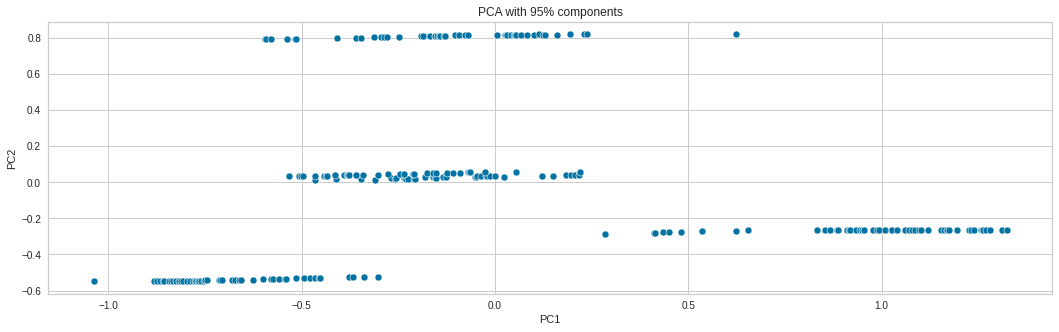

In [34]:
# Menampilkan informasi sebaran data yang telah di kompres
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear [:, 0], y=X_clear [:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 95% components')
plt.show()

Gambar di atas menujukkan kumpulan keseluruhan fitur-fitur dalam bentuk 2 dimensi, yang selanjutnya akan dilakukan cluster sesuai karkteristik masing-masing data.

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6a - K-Means Model Definition



In [35]:
# Melakukan perulangan untuk cluster terbaik
K_kmeans = [KMeans(n_clusters=k, random_state=10).fit(X_clear)
                for k in range(1, 8)]

Elbow Method


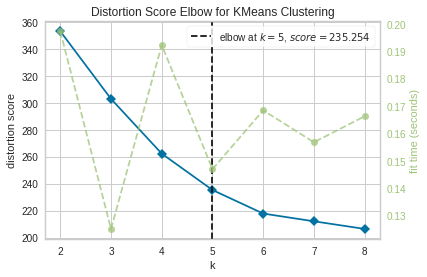

In [36]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
print('Elbow Method')
Elbowdata = KElbowVisualizer(KMeans(), k=8)
Elbowdata.fit(X_clear)
Elbowdata.show()

Berdasarkan pengecekan jumah cluster mengunakan elbow, bahwa distribusi cluster yang baik adalah K = 5 dengan score 235.254. Untuk lebih meyakinkan, bisa dilakukan pengecekan melalui visualisasi silhouette.

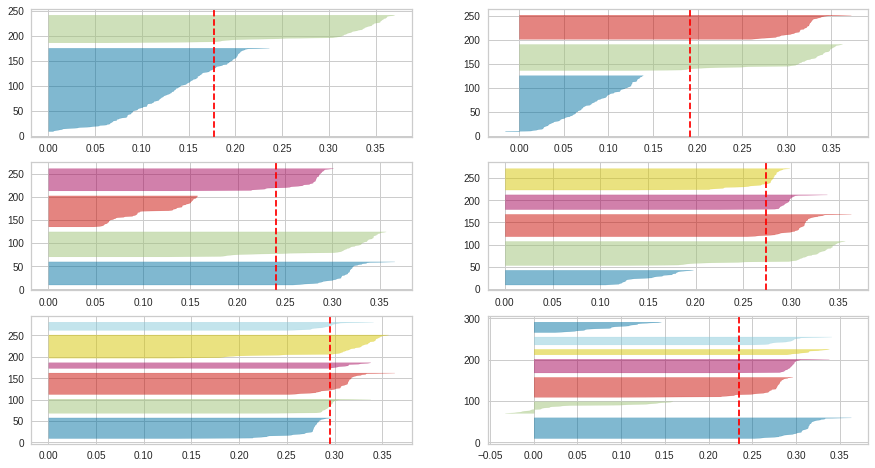

In [37]:
# Mencari nilai K cluster terbaik berdasarkan visualisasi silhouette
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_clear) 

Berdasarkan visualisasi silhouette, juga bisa dilihat untuk K = 2, menghasilkan pembentukan cluster yang baik dimana seluruh pengelompokan melewati batas korelasi gari merah. Sumber pengecekan visualisasi silhouette [link](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/). Melalui pengecekan plot elbow  K =5 dan visualisasi silhouette K =2, maka cluster terbaik yang terbentuk adalah K=2.


In [38]:
# Definisi model k-means menjadi empat cluster
kmeanscluster= KMeans(n_clusters=2, random_state=26)

K-Means Clustering salah satu metode yang melakukan pengelompokan data dengan sistem partisi. Pada model k-means yang telah didefinisikan, dilakukan partisi pengelompokan K=2.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7a - K-Means Model Training

In [39]:
# Model K-Means dilatih berdasarkan parameter model definition pada data yang sudah di PCA
kmeans_cluster = kmeanscluster.fit(X_clear)
kmeans_cluster

KMeans(n_clusters=2, random_state=26)

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8a - K-Means Model Evaluation

Text(0, 0.5, 'Silhouette Score')

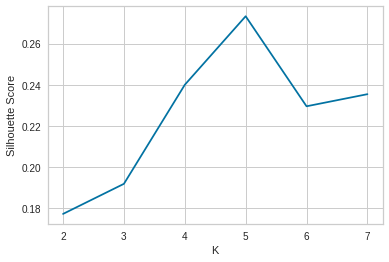

In [40]:
# Score silhoutte terhadap cluster yang telah terbentuk
K=[2,3,4,5,6,7]
score_evaluation=[silhouette_score(X_clear, KMeans(n_clusters=i).fit(X_clear).labels_) for i in K]
plt.plot(K,score_evaluation)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [41]:
score_evaluation

[0.17715351992590228,
 0.19179063492598095,
 0.23996550283440632,
 0.2733123731146669,
 0.2295122952680301,
 0.23540152155986926]

Model evaluation berdasarkan score silhouette diperolah bahwa cluster 2 cukup baik.

In [42]:
# Prediksi cluster yang terbentuk dari metode K-Means
kmeans_clusters = kmeans_cluster.fit_predict(X_clear)
kmeans_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1], dtype=int32)

Menghasilkan clustering dimasing-masing baris data kartu kredit, dimana membentuk K-means 2 kelompok yaitu 0 dan 1.

# 9 - Visualisasi Clustering 

## 9a - K-Means Visualisasi

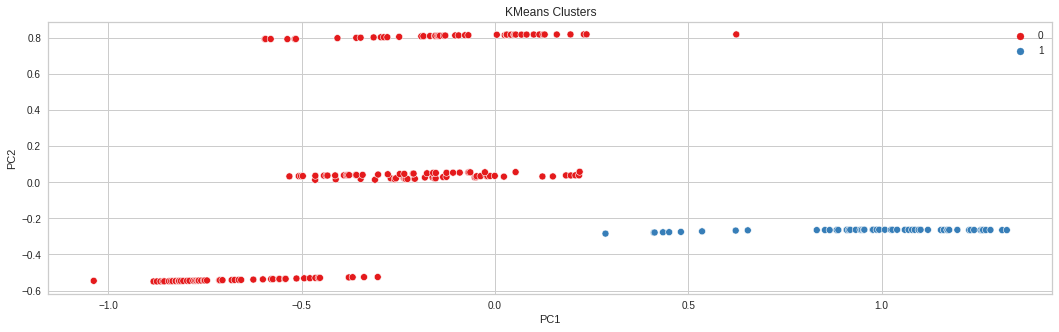

In [43]:
# Visualisasi hasil PCA metode K-Means
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_clear[:, 0], y=X_clear[:, 1], hue=kmeans_cluster.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Berdasarkan hasil visualisasi plot clustering mengunakan metode K-Means, digambarkan kelompok 0 (merah) berkumpul menjadi clustering bagian sebeah kanan, namun masih ada beberapa cluster 0 menjauh atau outier dari setroid tengahnya. Untuk kelompok 1 (Biru) berkumpul menjadi satu clustering bagian kiri atas dengan baik. 

In [44]:
# Membuat tabel baru hasil clustering metode K-Means
kmeans_cluster2 = data_copy.copy()
kmeans_cluster2['cluster-Kmeans'] = kmeans_cluster.labels_

In [45]:
# Melihat jumlah masing-masing data dari cluster K-Means yang telah terbentuk
KM_cluster = kmeans_cluster2.groupby('cluster-Kmeans').size().to_frame()
KM_cluster.columns = ["KM_size"]
KM_cluster

,KM_size
cluster-Kmeans,
0,168
1,55


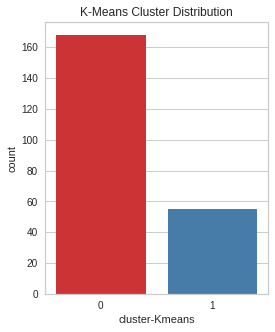

In [46]:
# Visualisasi Diagram Batang Clustering K-Means
plt.figure(figsize=(4, 5))
sns.countplot(data=kmeans_cluster2, x='cluster-Kmeans', palette='Set1')
plt.title('K-Means Cluster Distribution')
plt.show()

Berdasarkan hasil visualisasi digram batang mengenai K-Means cluster distribution, dari jumlah bari data kartu kredit dengan 223 baris dan 6 fitur, terbentuk 2 cluster. Cluster 0 sebanyak 168 data dari 6 fitur awal. Cluster 1 sebanyak 55 data dari 6 fitur awal. Sehingga data informasi negara cendrung berkumpul sesui kategori karakteristik pada cluster 0.

In [57]:
# Hasil Clustering masing-masing metode dengan data aslinya
data1 = kmeans_cluster2[['cluster-Kmeans']]
negara = pd.concat([data,data1], axis=1)
negara

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster-Kmeans
0,1,Monaco,89.5,85.6,93.5,Europe,0
1,2,Japan,85.0,81.7,88.5,Asia,0
2,3,Singapore,85.0,82.3,87.8,Asia,0
3,4,Macau; China,84.5,81.6,87.6,Asia,0
4,5,San Marino,83.3,80.7,86.1,Europe,0
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,1
219,220,Swaziland,51.6,52.2,51.0,Africa,1
220,221,Afghanistan,51.3,49.9,52.7,Asia,0
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,1


In [62]:
cluster0 = negara[negara["cluster-Kmeans"] <= 0]
cluster0 

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster-Kmeans
0,1,Monaco,89.5,85.6,93.5,Europe,0
1,2,Japan,85.0,81.7,88.5,Asia,0
2,3,Singapore,85.0,82.3,87.8,Asia,0
3,4,Macau; China,84.5,81.6,87.6,Asia,0
4,5,San Marino,83.3,80.7,86.1,Europe,0
...,...,...,...,...,...,...,...
174,175,Yemen,65.5,63.4,67.8,Asia,0
179,180,Cambodia,64.5,62.0,67.1,Asia,0
180,181,Laos,64.3,62.2,66.4,Asia,0
185,186,Haiti,63.8,61.2,66.4,North America,0


In [63]:
cluster1 = negara[negara["cluster-Kmeans"] >= 1]
cluster1

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster-Kmeans
44,45,"Saint Helena, Ascension and Tristan da Cunha",79.5,76.6,82.6,Africa,1
77,78,Morocco,76.9,73.8,80.1,Africa,1
78,79,Algeria,76.8,75.5,78.2,Africa,1
85,86,Libya,76.5,74.7,78.3,Africa,1
89,90,Tunisia,76.1,74.0,78.4,Africa,1
98,99,Mauritius,75.6,72.2,79.2,Africa,1
115,116,Seychelles,74.7,70.2,79.4,Africa,1
138,139,Egypt,72.7,71.4,74.2,Africa,1
146,147,Cabo Verde,72.1,69.8,74.5,Africa,1
170,171,Ghana,66.6,64.1,69.1,Africa,1


# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [48]:
# Sebelum inference kita tampilkan dulu data inference yang di awal
datainfernce

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,189,South Africa,63.1,61.6,64.6,Africa
1,27,Cayman Islands,81.2,78.5,84.0,North America
2,77,Dominica,77.0,74.0,80.1,North America
3,69,Poland,77.6,73.7,81.7,Europe
4,79,Algeria,76.8,75.5,78.2,Africa
5,88,Republic of Macedonia,76.2,73.6,79.0,Europe
6,103,American Samoa,75.4,72.4,78.5,Oceania
7,61,Dominican Republic,78.1,75.9,80.5,North America
8,70,United Arab Emirates,77.5,74.8,80.2,Asia
9,122,Montserrat,74.4,75.8,72.9,North America


In [49]:
# Memisahkan antara kolom numerik dengan kolom kategorik

numerik_col_inf = datainfernce._get_numeric_data().columns.tolist()
kategorik_col_inf = datainfernce.select_dtypes(include=['object']).columns.tolist()
print('Numeric Columns infernce     : ', numerik_col_inf)
print('Categorical Columns infernce : ', kategorik_col_inf)

Numeric Columns infernce     :  ['Rank', 'Overall Life', 'Male Life', 'Female Life']
Categorical Columns infernce :  ['Country', 'Continent']


In [50]:
inf_num=datainfernce[numerik_col_inf]
inf_cat=datainfernce[kategorik_col_inf]

In [51]:
# Numeric Scaling
# Membuat antara fitur memiliki range ukuran yang sama
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(inf_cat)
datainfgod = encoder.transform(inf_cat).toarray()
datainfgod

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [53]:
# Feature Scaling pada data inference
inf_scaler = MinMaxScaler()
inf_scaler = inf_scaler.fit(inf_num)
datagood_inf = inf_scaler.transform(inf_num)
datagood_inf

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 1.        , 1.        ],
       [0.30864198, 0.7679558 , 0.73372781, 0.79896907],
       [0.25925926, 0.80110497, 0.71597633, 0.8814433 ],
       [0.32098765, 0.75690608, 0.82248521, 0.70103093],
       [0.37654321, 0.72375691, 0.71005917, 0.74226804],
       [0.4691358 , 0.67955801, 0.63905325, 0.71649485],
       [0.20987654, 0.82872928, 0.84615385, 0.81958763],
       [0.2654321 , 0.79558011, 0.78106509, 0.80412371],
       [0.58641975, 0.62430939, 0.84023669, 0.42783505]])

In [54]:
inf_final = np.concatenate([datainfgod, datagood_inf], axis=1)
inf_final

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.30864198, 0.7679558 , 0.73372781, 0.79896907],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.259

## 10a - Model Inference K-means

In [55]:
# Hasil Prediksi clustering dari data baru Inference menggunakan metode K-Means
kmeans_clusters_inf = kmeans_cluster.fit_predict(inf_final)
Kmeans_Inference = pd.DataFrame(kmeans_clusters_inf, columns=['K-Means Inference'])
Kmeans_Inference

,K-Means Inference
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,1


Data inference menggunakan metode K-Means rata-rata masuk di clustering kelompok 0 dan 1.

In [56]:
# Menggabungkan hasil clustering pada data inference
pd.concat([datainfernce,Kmeans_Inference], axis=1)

,Rank,Country,Overall Life,Male Life,Female Life,Continent,K-Means Inference
0,189,South Africa,63.1,61.6,64.6,Africa,0
1,27,Cayman Islands,81.2,78.5,84.0,North America,1
2,77,Dominica,77.0,74.0,80.1,North America,1
3,69,Poland,77.6,73.7,81.7,Europe,0
4,79,Algeria,76.8,75.5,78.2,Africa,0
5,88,Republic of Macedonia,76.2,73.6,79.0,Europe,0
6,103,American Samoa,75.4,72.4,78.5,Oceania,0
7,61,Dominican Republic,78.1,75.9,80.5,North America,1
8,70,United Arab Emirates,77.5,74.8,80.2,Asia,0
9,122,Montserrat,74.4,75.8,72.9,North America,1


# 11 - Pengambilan Kesimpulan

Proses Model clustering untuk mendeteksi kelompok negara. Data informasi negara memiliki 223 baris dan 6 fitur. Berdasarkan informasi 18 fitur, maka saya akan menanalisis clustering yaitu menggunakan metode K-Means.

---
**Exploratory Data Analysis (EDA)**

Berdasarkan Hasil Visualisasi diagram batang, bahwa negara Africa memiliki informasi yang lebih banyak, lalu dilanjutkan negara kedua yaitu negara Europe. Informasi negara yang kurang spesifik atau sedikit adalah negara South America.

---
**Clustering K-Means**

Berdasarkan proses pemilihan nilai K menggunakan metode elbow diperoleh K terbaik yaitu 5 sedangkan melalui visualisasi silhouette di dapatkan K terbaik yaitu 2, setelah dilakukan pengecekan jumlah clustering terbaik, maka visualisasi silhoutte lebih terlihat adalah k=2. Jika di tinjau dari hasil visualisasi bahwa metode K-Means melakukan clustering dengan baik dibandingkan metode lainnya. Hasil visualisasi diagram batang mengenai K-Means cluster distribution, dari jumlah bari data kartu kredit dengan 223 baris dan 6 fitur, terbentuk 2 cluster. Cluster 0 sebanyak 168 data dari 6 fitur awal. Cluster 1 sebanyak 55 data dari 6 fitur awal. Sehingga data informasi negara cendrung berkumpul sesui kategori karakteristik pada cluster 0.


# Problems

> Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mendeteksi kelompok negara dan jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

> 1 - Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

Jawab : Berdasarkan EDA hasil clustering, diperoleh bahwa banyak informasi setiap baris pada dataset negara masuk kedalam clustering 0 lebih banyak dibandingkan informasi negara yang masuk ke clustering 1.

> 2 - Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

Jawab : Jumlah cluster dari metode K-means sebanyak 2 kelompok. Jika di tinjau visualisasi awal dengan PCA tanpa clustering K-Means terdapat data yang menyebar terpisah satu sama lain, jadi jika dikelompokkan menjadi 2 kelompok, masih kurang optimal. Hasil Visuaisasi K-means hasil reduksi terbagi menjadi 2 kelompok, sebelah kiri merupahan kelompak(merah/0) sedangkan sebelah kanan merupakan kelompok (biru/1).

> 3 - Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

Jawab : Berdasarkan hasil query untuk kelompok 0, didominasi informasi dari negara Europe, asia, North America, Oceania dan South America, dimana kelompok 0 menampilkan informasi dari negar-negara di benua asia, eropa dan amerika. Berdasarkan hasil query untuk kelompok 1, didominasi informasi dari negara africa, dimana kelompok 1 menampilkan informasi dari negar-negara di benua africa saja.

> 4 - Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

Jawab : Informasi yang menarik saah satunya, cluster 0 terdiri dari beberapa benua yang secara kultur budaya sangat berbeda yaitu benua europa, asia dan amerika. Mungkin jika pebentukan clustering K nya lebih dari 2, bisa membedakan antara kawasan benua negara tersebut.

> 5 - Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

Jawab : Salah satu Kesamaan antara EDA fitur negara dengan hasil clustering adalah Negara africa membentuk kelompok yang berbeda antara benua lainnya. Africa memiliki informasi baris yang lebih banyak sehingga ketika dilakukan pengelompokan akan clustering sendiri terpisah dengan benua lain.

